In [1]:
import numpy as np
import matplotlib.pyplot as plt
# number of classes = 1; use binary_crossentropy (and sigmoid activation function)
# number of classes > 1; use categorical_crossentropy (and softmax activation function)

# currently I need around 5000 epochs to get somewhat decent optimisation. 
# is the default step in the optimizer very small? and should we make this bigger?
# what optimizers to use and when?

# Generate Dataset

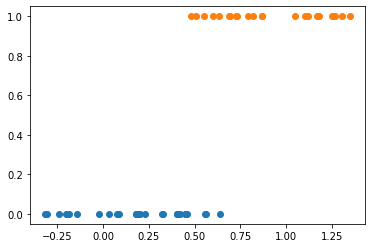

In [245]:
scale = 0.35
dim = 1
set_nr = 2
set_size = 25
for i in range(set_nr):
    center_point = scale * np.full((set_size, dim), -1)
    for flip in range(i):
        center_point.T[flip] = scale
    x_set_points = np.random.random_sample((set_size, dim)) + center_point
    y_set_labels = np.full(set_size, i)
    #if dim >= 3:
    #    plt.scatter3D(x_set_points.T[0], x_set_points.T[1], x_set_points.T[2])
    #else:
    if dim == 1:
        plt.scatter(x_set_points, y_set_labels)
    else:
        plt.scatter(x_set_points.T[0], x_set_points.T[1])
    if i > 0:
        x_points = np.concatenate((x_points, x_set_points), axis=0)
        y_labels = np.concatenate((y_labels, y_set_labels), axis=0)
    else:
        x_points = x_set_points
        y_labels = y_set_labels
plt.show()

# Fit Neural Network

In [250]:
# next we create a neural net in Keras that is going to perform logistic regression, 
# and should find the probability for each point to fit in a certain label
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(1, 
                input_dim=1, 
                activation='sigmoid'))

# I manaually forced the Adam optimizer to use a learning rate of 10,
# in order to make it converge much faster
custom_adam = Adam(learning_rate=15, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss = 'binary_crossentropy', optimizer=custom_adam, metrics=['accuracy'])

In [251]:
fit_history = model.fit(
    x_points, 
    y_labels, 
    epochs=25, # how may times do we go through the entire dataset
    verbose=0 # set to '2' to print progress bar
)

In [252]:
print(fit_history.history.keys())

dict_keys(['loss', 'accuracy'])


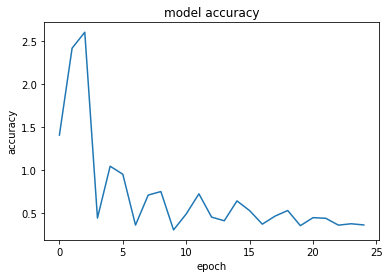

In [253]:
plt.plot(fit_history.history['loss'])
#plt.plot(fit_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [254]:
model_predictions = model.predict(
    x_points)

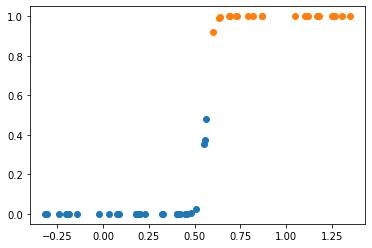

In [255]:
plt.scatter(x_points[model_predictions < 0.5], model_predictions[model_predictions<0.5])
plt.scatter(x_points[model_predictions > 0.5], model_predictions[model_predictions>0.5])
plt.show()